# Neyman Orthogonality Proof

$$
y=\alpha D+\beta'W+\epsilon
$$
$$
\overline{y}=y-X'W; \overline{D}=D-X_{n1.1}
$$
Se propone
$$
\overline{y}=a
\overline{D}+u
$$

$$
\alpha = \arg \min_{a \in \mathbb{R}} E[(\overline{y} - a\overline{D})^2] = E[\overline{D}^2]^{-1} - E[\overline{D}y]^2
$$
alpha se puede recuperar de la regresión lineal poblacional de Y o D
$$
a=\overline{\alpha} 
$$ 
resuelve la ecuación:
$$
E(\overline{y}-a\overline{D})\overline{D}=0
$$
Entonces, si tenemos una muestra aleatoria,
$$
(y_i,x_i)^\eta_{i=1}
$$
debemos imitar el procedimiento de partición en la población.

## NEYMAN ORTHOGONALITY

alpha : parametro obejtivo
eta: parámetros de proyección con valor real
$$
\eta°=(\delta'_{DW}, \delta'_{YW})'
$$
$$
\alpha=\alpha(\eta)
$$
por el IMPLICIT FUNCTION THEOREM
$$
D=\partial a M(\alpha,\eta°)^{-1} \partial \eta M(\alpha,\eta°)
$$
y
$$
\partial \eta_{1} M(\alpha, \eta°)=E(W \overline{D})=0
$$
$$
\partial \eta_{2} M(\alpha, \eta°)=-E(W\overline{y})+2E(\alpha W \overline{D})=0
$$
usando ITF
$$
\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]da+\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]d\eta=0
$$
$$
\frac{da}{d\eta} = \left(-\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]^{-1} \left[\frac{\partial M}{\partial \eta}(a, \eta°)\right]\right)
$$
$$
\left[\frac{\partial M}{\partial \eta}(\alpha, \eta_0)\right]=\left[\frac{\partial M}{\partial \eta_1}(\alpha, \eta_0)\right]+\left[\frac{\partial M}{\partial \eta_2}(\alpha, \eta_0)\right]
$$
$$
\left[\frac{\partial M}{\partial \eta}(\alpha, \eta_0)\right]=\left[\frac{\partial M}{\partial \eta_1}(\alpha, \delta'_{yW}, \delta'_{DW})\right]+\left[\frac{\partial M}{\partial \eta_2}(\alpha, \delta'_{yW}, \delta'_{DW})\right]
$$
## Para S1:
$$
\frac{\partial M}{\partial \eta_1}(\alpha, \delta'_{yW}, \delta'_{DW})
$$


$$
S_1 = \frac{\partial M}{\partial \eta_1} \bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1=\frac{\partial E[[\overline y(\eta_1)-\overline{D}(\eta_2)]\overline{D}(\eta_2)]}{\partial \eta_1}
$$
$$
S_1=\frac{\partial E[\overline y(\eta_1)\overline{D}(\eta_2)]}{\partial \eta_1}
$$
y
$$
\overline y(\eta_1)=y-\eta_1W
$$
$$
S_1 = E[(W)\overline{D}(\eta _2)]\bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1 = E[(W)(D - \eta _2)]\bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1 = E[(W)(D-\delta'_{DW}W)]
$$
$$
S_1 = E[wD-\delta'_{DW}W]
$$
$$
S_1 = E[WD-W[(W'W)^{-1}(W'D)]'W]
$$
$$
S_1 = E[WD-WD]=0
$$

## Ahora en cuanto a S2:
$$
S_2 = \frac{\partial M}{\partial \eta_2} \bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$

$$
S_2 = -E[W\overline{y}]+2E[\alpha W\overline{D}] = 0
$$

Desarrollamos cada término usando las definiciones
$$ 
( \overline{y} = y - \eta_1 W )
$$ y 
$$
( \overline{D} = D - \eta_2 W )
$$
Primer Término: 
$$
( -E[W\overline{y}])
$$
$$
\overline{y} = y - \eta_1 W \implies -E[W\overline{y}] = -E[W(y - \eta_1 W)]
$$

Expandimos el producto dentro de la esperanza:

$$
-E[W\overline{y}] = -E[W y] + E[\eta_1 W^2]
$$

Donde 
$$
(\eta_1 = (\delta'_{yW})')
$$ tenemos:

$$
-E[W\overline{y}] = -E[W y] + (\delta'_{yW})' E[W^2]
$$

Segundo Término:
$$
( 2E[\alpha W\overline{D}])
$$

$$
\overline{D} = D - \eta_2 W \implies 2E[\alpha W\overline{D}] = 2E[\alpha W(D - \eta_2 W)]
$$

Expandimos el producto dentro de la esperanza:

$$
2E[\alpha W\overline{D}] = 2\alpha E[WD] - 2\alpha \eta_2 E[W^2]
$$

Donde 
$$
(\eta_2 = \delta'_{DW})
$$tenemos:

$$
2E[\alpha W\overline{D}] = 2\alpha E[WD] - 2\alpha (\delta'_{DW})' E[W^2]
$$

Sumando ambos para S2

$$
S_2 = -E[W y] + (\delta'_{yW})' E[W^2] + 2\alpha E[WD] - 2\alpha (\delta'_{DW})' E[W^2] = 0
$$
como
$$
S_2 =-E[W\overline{y}]+2E[\alpha W\overline{D}]=0
$$

# Code section

## Orthogonal Learning

In [53]:
library(hdm)

set.seed(1)

B = 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2] - 9 }

if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2] - 9}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2] - 9

}

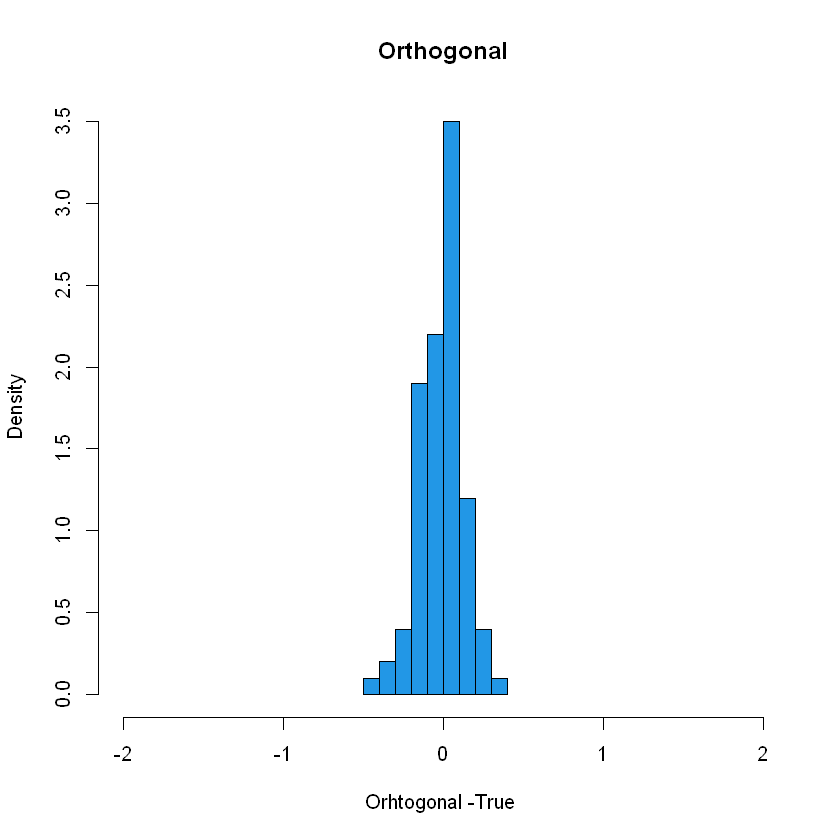

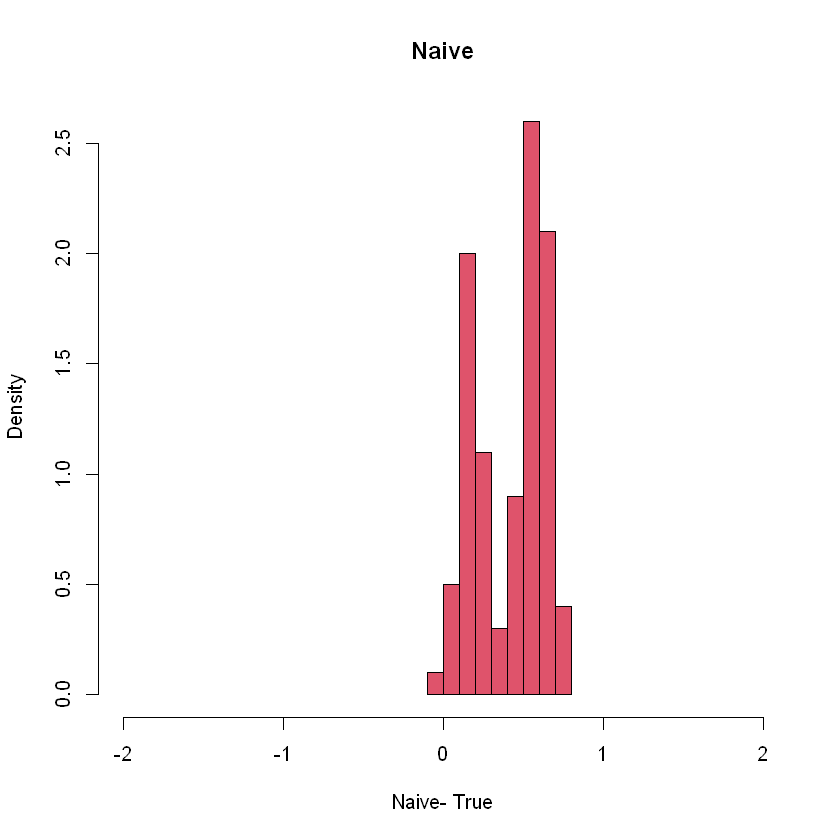

In [54]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

In [57]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2] -9 }

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2] -9}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2] - 9

}


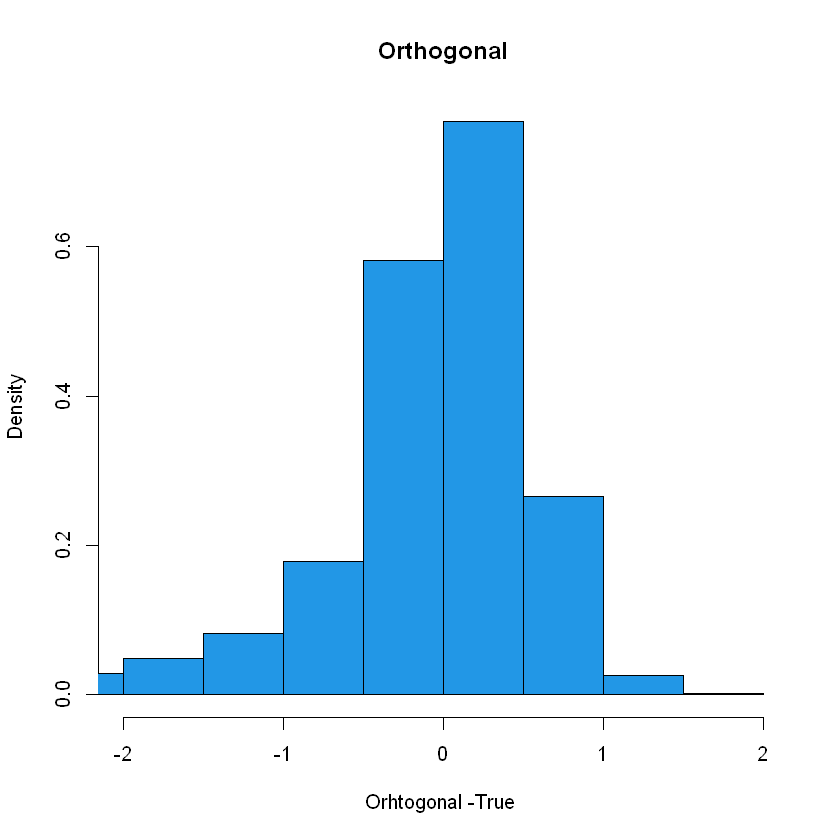

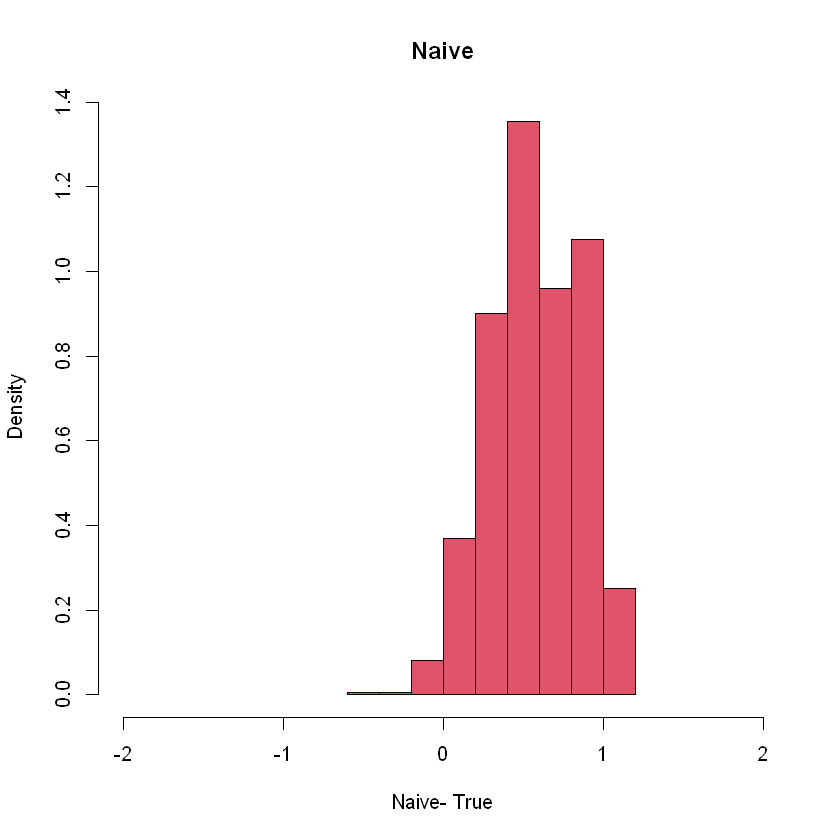

In [58]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [59]:
library(hdm)

set.seed(1)
B= 10000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2] -9 }

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2] -9}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2] - 9

}

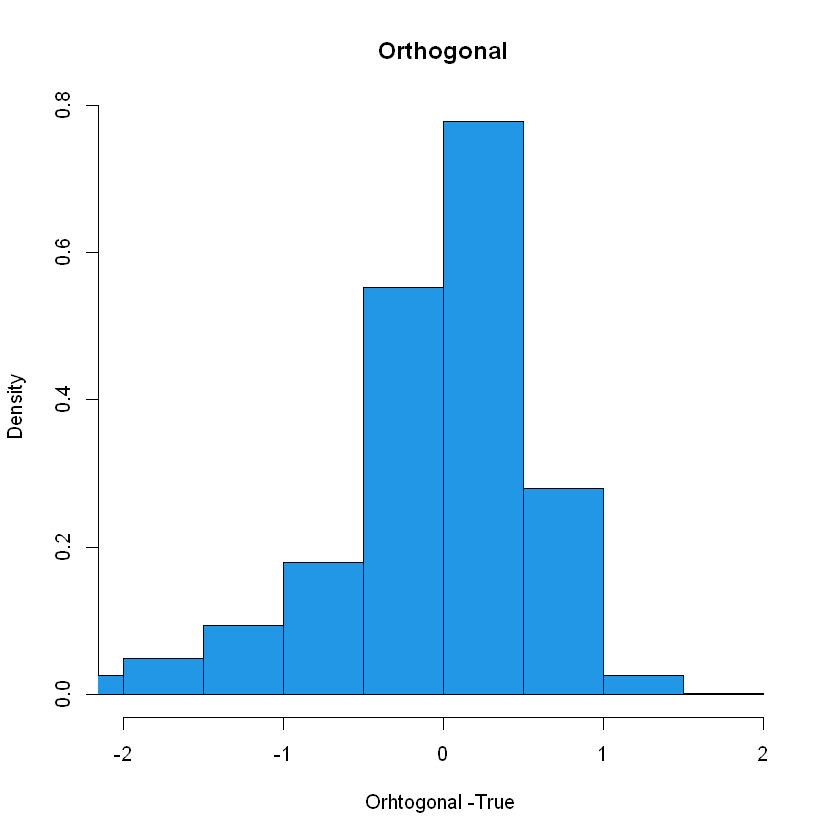

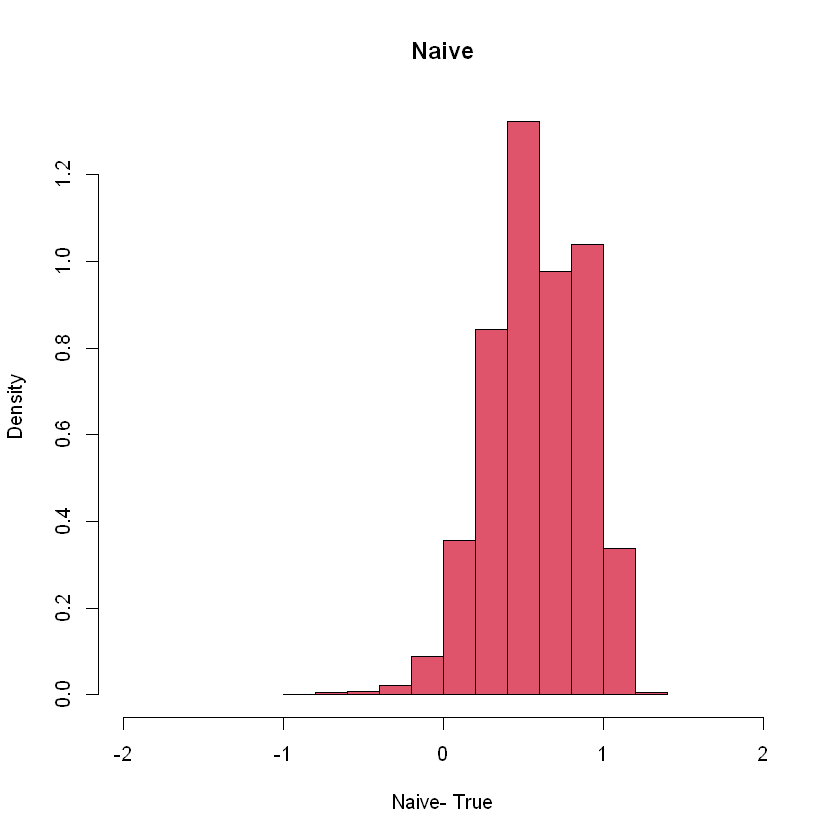

In [60]:
hist(Orthogonal-1,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

### Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?

The histogram for the "orthogonal" method is more tightly clustered around 0, while the one for the "naive" method is more spread out and centered around 0.5. This difference becomes more noticeable with larger values of B. Ideally, both histograms should be centered around 0, indicating that the estimated coefficients are closer to the true values.

### Why does this happen?

The "orthogonal" approach employs techniques such as residualization, where the outcome variable is regressed on covariates to obtain residuals, and then these residuals are regressed on another set of covariates. This procedure aims to make the residuals orthogonal to certain variables of interest, effectively addressing issues like omitted variable biases and endogeneity. 

### Explain why using parallel computing, the running time is lower. 

Parallel computing harnesses the power of multiple CPU cores to handle several tasks simultaneously, which speeds up processing. Instead of waiting for each task to finish before starting the next one, the system starts new tasks right away. This approach is especially handy for big loops, like the example provided, as it helps save time by efficiently using available resources. Nevertheless, this could also cause some problems in local variables, making the loop give errors.

## Double Lasso using school data R

In [ ]:
# Load packages
install.packages(c("glmnet", "hdm"))
library(glmnet)
library(hdm)

# Load data

data <- read.csv("bruhn2016.csv")

### OLS regression

In [ ]:
ols_model <- lm(outcome_test_score ~ is_female + mother_attended_secondary_school + father_attended_secondary_school + family_receives_cash_transfer + has_computer_with_internet_at_home + has_some_form_of_income + saves_money_for_future_purchases + intention_to_save_index + financial_autonomy_index, data = data)

summary(ols_model)

### Double Lasso using cross-validation

In [ ]:
# Variables
outcome_variable <- "outcome_test_score"
treatment_variable <- "is_female"
covariates <- c("mother_attended_secondary_school", 
                "father_attended_secondary_school", 
                "family_receives_cash_transfer", 
                "has_computer_with_internet_at_home", 
                "has_some_form_of_income", 
                "saves_money_for_future_purchases", 
                "intention_to_save_index", 
                "financial_autonomy_index")

# Prepare data
X_cv <- model.matrix(~ . - 1, data = data[, covariates])
y_cv <- data[[outcome_variable]]
d_cv <- data[[treatment_variable]]

# Controls for outcome
cv_lasso_y <- cv.glmnet(X_cv, y_cv)
selected_vars_y_cv <- which(coef(cv_lasso_y, s = "lambda.min") != 0) - 1
selected_vars_y_cv <- selected_vars_y_cv[selected_vars_y_cv > 0]

# Controls for treatment
cv_lasso_d <- cv.glmnet(X_cv, d_cv)
selected_vars_d_cv <- which(coef(cv_lasso_d, s = "lambda.min") != 0) - 1
selected_vars_d_cv <- selected_vars_d_cv[selected_vars_d_cv > 0]

# Combine selected variables from both lasso regressions
selected_vars_cv <- unique(c(selected_vars_y_cv, selected_vars_d_cv))

# Selected variables
final_X_cv <- X_cv[, selected_vars_cv]
final_data_cv <- data.frame(outcome_test_score = y_cv, is_female = d_cv, final_X_cv)

# OLS regression
final_model_cv <- lm(outcome_test_score ~ is_female + ., data = final_data_cv)

summary(final_model_cv)

### Double lasso using theoretical lambda

In [ ]:
# Prepare data
x_tl <- as.matrix(data[, covariates])
y_tl <- data[[outcome_variable]]
d_tl <- data[[treatment_variable]]

# Double lasso with theoretical lambda
double_lasso_tl <- rlassoEffect(x_tl = x_tl, y_tl = y_tl, d_tl = d_tl, method = "double selection", penalty = list(lambda.start = "theoretical"))

summary(double_lasso_tl)

### Double Lasso using method = “partialling out”

In [ ]:
# Prepare data
x_po <- data[, covariates]
y_po <- data[[outcome_variable]]
d_po <- data[[treatment_variable]]

# Partialling out method
double_lasso_po <- partiallingOut(y_po = y_po, d_po = d_po, x_po = x_po)

summary(double_lasso_po)

### Main coefficient and confidence interval

In [ ]:
# Extract coefficients and confidence intervals for OLS
ols_coef <- coef(ols_model)
ols_ci <- confint(ols_model)

# Extract coefficients and confidence intervals for double lasso with cross-validation
cv_coef <- coef(final_model_cv)
cv_ci <- confint(final_model_cv)

# Extract coefficients and confidence intervals for double lasso with theoretical lambda
tl_coef <- double_lasso_tl$coef
tl_ci <- double_lasso_tl$confint

# Extract coefficients and confidence intervals for double lasso using partialling out
po_coef <- double_lasso_po$coef
po_ci <- double_lasso_po$confint

# Results
# Display results
cat("OLS Coefficients:\n")
print(ols_coef)
cat("\nOLS Confidence Intervals:\n")
print(ols_ci)
cat("\nDouble Lasso with Cross-Validation Coefficients:\n")
print(cv_coef)
cat("\nDouble Lasso with Cross-Validation Confidence Intervals:\n")
print(cv_ci)
cat("\nDouble Lasso with Theoretical Lambda Coefficients:\n")
print(tl_coef)
cat("\nDouble Lasso with Theoretical Lambda Confidence Intervals:\n")
print(tl_ci)
cat("\nDouble Lasso using Partialling Out Coefficients:\n")
print(po_coef)
cat("\nDouble Lasso using Partialling Out Confidence Intervals:\n")
print(po_ci)